In [1]:
# Import necessary libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
results_file = "evaluation_section.json"
results_total_file = "evaluation_total.json"

with open(results_file, 'r') as f:
    data = json.load(f)

with open(results_total_file, 'r') as f:
    data_total = json.load(f)

In [3]:
models_data = []
for dataset in [data, data_total]: 
    for model in dataset['models']:
        model_name = model['model_name']
        for checkpoint in model['checkpoint']:
            checkpoint_name = checkpoint['model_checkpoint']
            for dataset in checkpoint['val_datasets']:
                dataset_name = dataset['dataset_name']
                metrics = dataset['metrics']
                num_samples = dataset['num_samples']
                models_data.append({
                    "model_name": model_name,
                    "checkpoint": checkpoint_name,
                    "dataset": dataset_name,
                    **metrics,
                    "num_samples": num_samples
                })

In [4]:
df = pd.DataFrame(models_data)
df

,model_name,checkpoint,dataset,accuracy,precision,recall,f1_score,macer,bpcer,macer_at_bpcer,num_samples
0,efficientnet_b1_greyscale,model_epoch_19.pth,E01_Global_val_lab.txt,0.985508,0.984344,0.986695,0.985518,0.013305,0.015678,0.018685,76247
1,efficientnet_b1_greyscale,model_epoch_19.pth,E04_Local_Match_val_lab.txt,0.973992,0.983976,0.963653,0.973708,0.036347,0.015678,0.047290,76247
2,efficientnet_b1_greyscale,model_epoch_19.pth,E05_DST_val_lab.txt,0.987173,0.984396,0.990028,0.987204,0.009972,0.015678,0.013489,76247
3,efficientnet_b1_greyscale,model_epoch_19.pth,E06_Twente_val_lab.txt,0.985219,0.984335,0.986117,0.985225,0.013883,0.015678,0.019525,76247
4,efficientnet_b1_greyscale,model_epoch_19.pth,E07_Lincoln_val_lab.txt,0.983435,0.984279,0.982548,0.983413,0.017452,0.015678,0.023225,76247
...,...,...,...,...,...,...,...,...,...,...,...
75,resnet34_greyscale,model_epoch_21.pth,total,0.978233,0.995110,0.979803,0.987397,0.020197,0.032299,0.043882,297147
76,resnet18_full,model_epoch_10.pth,total,0.968356,0.995794,0.967726,0.981560,0.032274,0.027422,0.067892,297147
77,efficientnet_b0_full,model_epoch_25.pth,total,0.975679,0.997463,0.974532,0.985864,0.025468,0.016629,0.034981,297147
78,s2d_greyscale,model_epoch_7.pth,total,0.941389,0.986148,0.945940,0.965626,0.054060,0.089140,0.232192,297147


In [14]:
def single_metric():
    """
    Generates a bar chart of MACER@BPCER=0.01 by dataset for each model.
    Excludes checkpoints from the x-axis labels.
    Removes .txt and dataset prefixes from labels.
    """
    df['model_plot_label'] = df['model_name']

    df['dataset_clean'] = df['dataset'].str.replace(r'^E\d+_', '', regex=True).str.replace('_val_lab.txt', '')

    numeric_cols = ['macer_at_bpcer']
    grouped = df.groupby(["model_plot_label", "dataset_clean"])[numeric_cols].mean()

    macer_data = grouped['macer_at_bpcer'].unstack()

    macer_data.plot(kind='bar', figsize=(14, 6), alpha=0.8, edgecolor='black')
    plt.title("MACER@BPCER=0.01 by Dataset for Each Model", fontsize=16)
    plt.ylabel("MACER@BPCER=0.01", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(rotation=15, fontsize=12, ha='right')
    plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

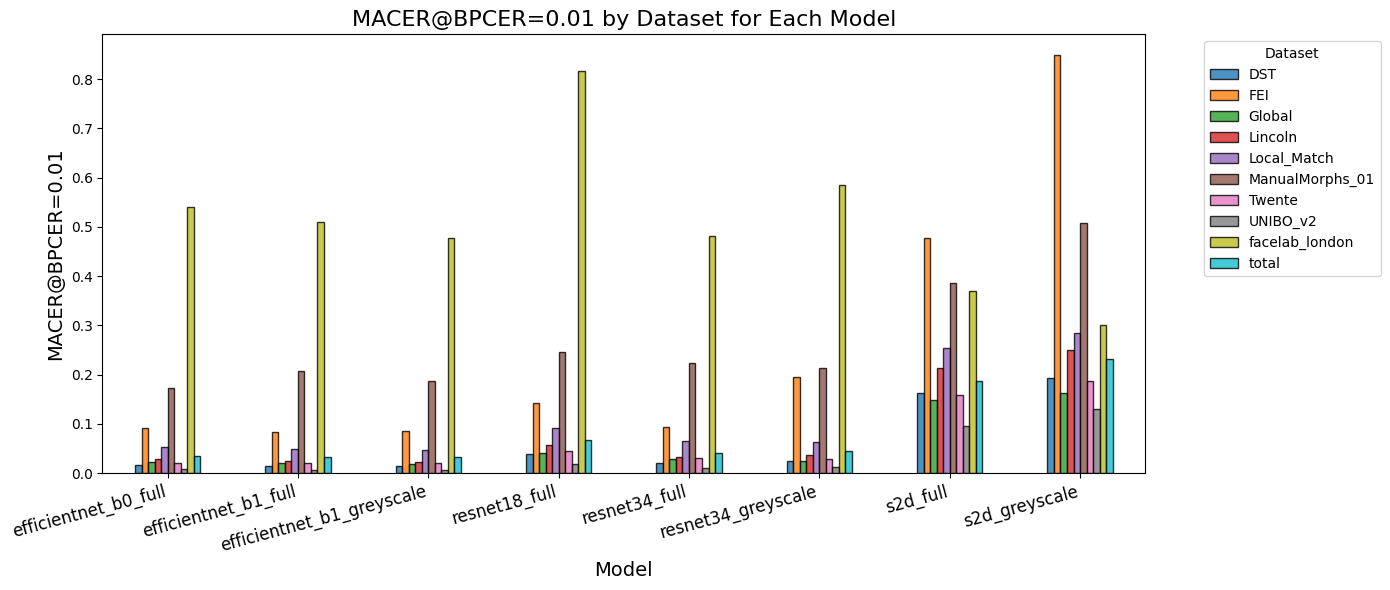

In [15]:
single_metric()

In [16]:
def NIST_metrics():
    """
    Generates a bar chart of MACER, BPCER, and MACER@BPCER for each model, 
    focusing only on the 'total' dataset.
    Excludes checkpoints from the x-axis labels.
    """
    df['model_plot_label'] = df['model_name']

    total_data = df[df['dataset'] == 'total']

    nist_metrics = ['macer', 'bpcer', 'macer_at_bpcer']

    metric_data = total_data.groupby("model_plot_label")[nist_metrics].mean()

    metric_data.plot(kind='bar', figsize=(10, 5), alpha=0.8, edgecolor='black')
    plt.title("NIST Metrics by Model for Total Dataset", fontsize=16)
    plt.ylabel("Metric Value", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(rotation=15, fontsize=12, ha="right")
    plt.legend(title="NIST Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

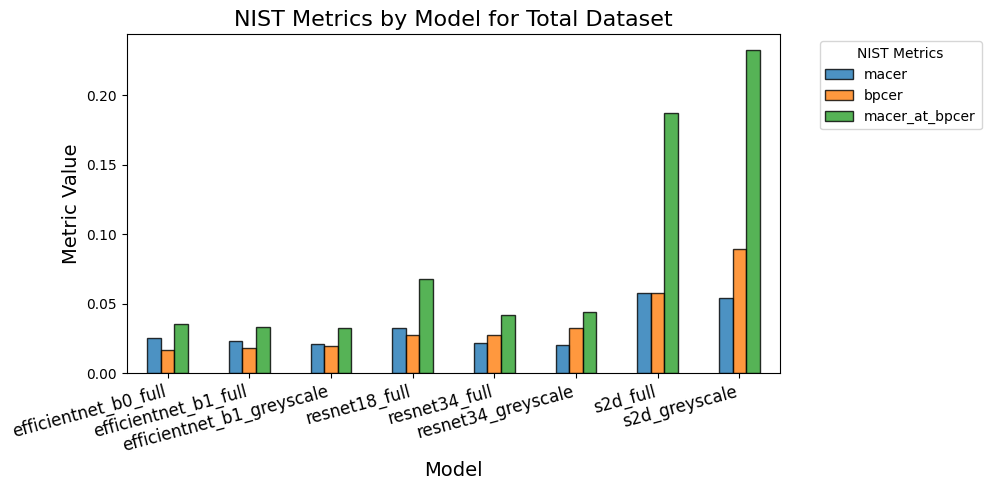

In [17]:
NIST_metrics()

In [18]:
def general_metrics():
    """
    Generates a bar chart of Accuracy, Precision, Recall, and F1-score for each model, 
    focusing only on the 'total' dataset.
    Excludes checkpoints from the x-axis labels and zooms y-axis to 0.8-1.0.
    """
    df['model_plot_label'] = df['model_name']

    total_data = df[df['dataset'] == 'total']

    general_metrics = ['accuracy', 'precision', 'recall', 'f1_score']

    metric_data = total_data.groupby("model_plot_label")[general_metrics].mean()

    ax = metric_data.plot(kind='bar', figsize=(10, 5), alpha=0.8, edgecolor='black')
    plt.title("General Metrics by Model for Total Dataset", fontsize=16)
    plt.ylabel("Metric Value", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(rotation=15, fontsize=12, ha="right")
    plt.ylim(0.8, 1.0)  # Focus only on values between 0.8 and 1.0
    plt.legend(title="General Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

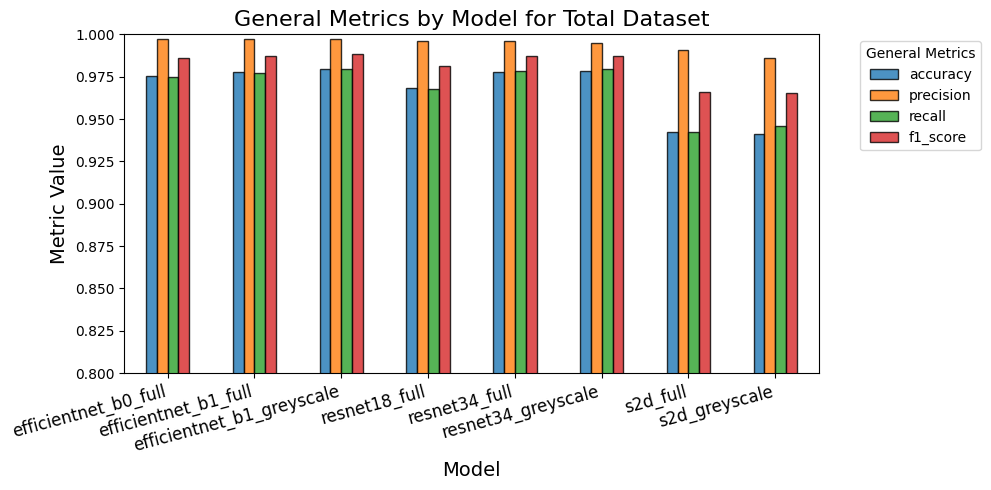

In [19]:
general_metrics()

In [20]:
def single_set(metrics=None, dataset_name=None):
    """
    Generates a bar chart of selected metrics by dataset for each model.
    Allows filtering by dataset (subfolder or 'total') and metric(s).

    Parameters:
    - metrics (str or list of str): Metric(s) to plot (default: 'macer_at_bpcer').
    - dataset_name (str): Specific dataset to filter (default: None, meaning all datasets are shown).
    """
    if metrics is None:
        metrics = ['macer_at_bpcer']
    elif isinstance(metrics, str):
        metrics = [metrics]

    df['model_plot_label'] = df['model_name']

    if dataset_name:
        filtered_df = df[df['dataset'] == dataset_name]
    else:
        filtered_df = df

    grouped = filtered_df.groupby(["model_plot_label", "dataset"])[metrics].mean()

    metric_data = grouped.unstack()

    metric_data.plot(kind='bar', figsize=(14, 6), alpha=0.8, edgecolor='black')
    plt.title(f"{', '.join(metrics)} by Dataset for Each Model", fontsize=16)
    plt.ylabel("Metric Value", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(rotation=15, fontsize=12, ha='right')
    plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

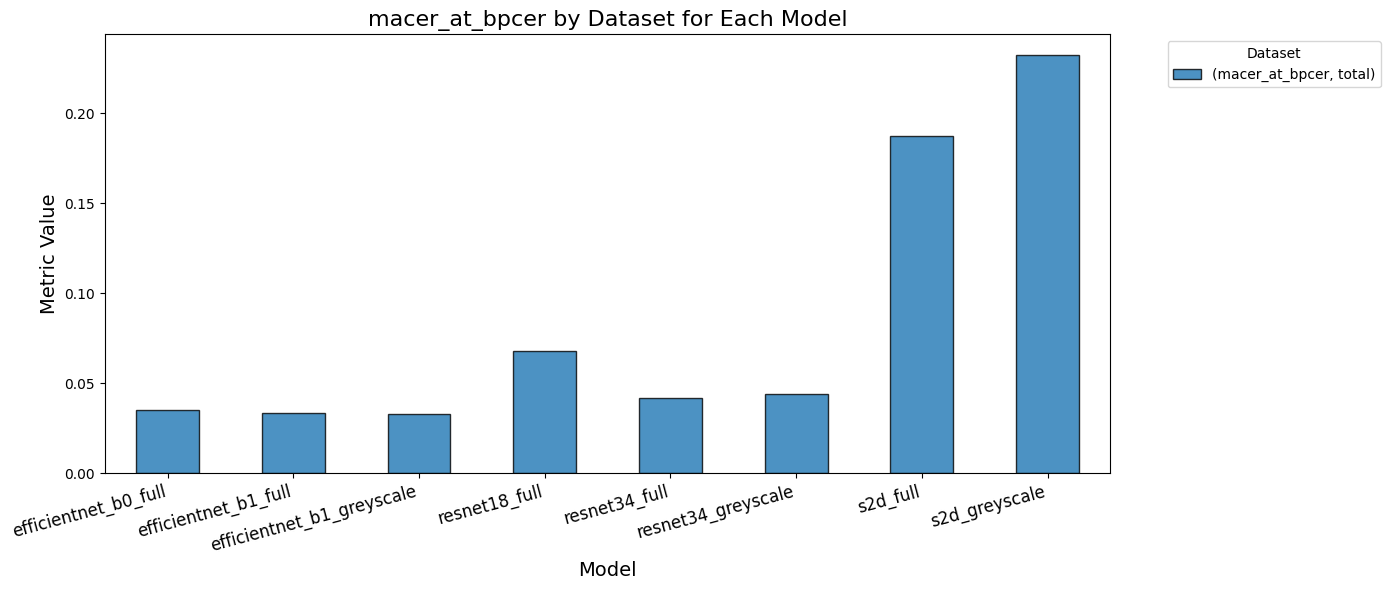

In [21]:
single_set(dataset_name="total")

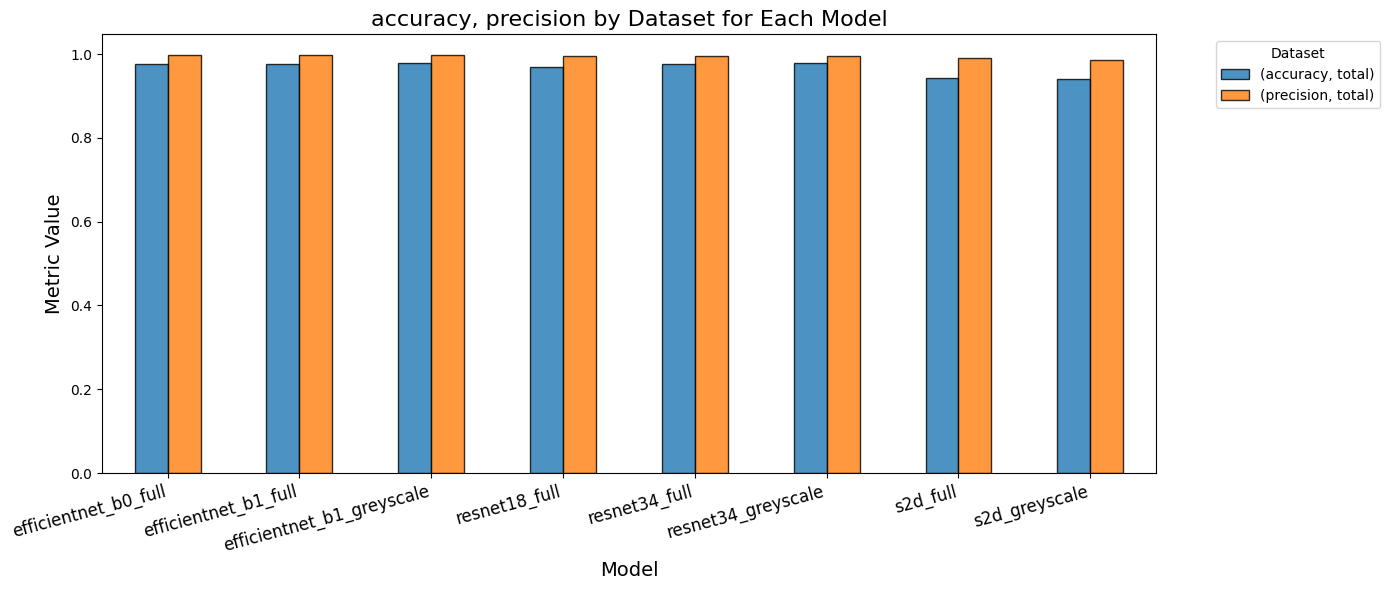

In [22]:
single_set(metrics=["accuracy", "precision"], dataset_name="total")